# [Gradient Descent Using Loss Function](https://youtu.be/ABrrSwMYWSg?list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH)  


![ytss](assets/lossFunc.png)
![ytss](assets/lossFunc1.png)
![ytss](assets/lossFunc2.png)  
<br>
### Expanding the first terms in the loss function...
<br>

![ytss](assets/lossFunc3.png)
![ytss](assets/lossFunc4.png)
<br>
### For the expansion of second term, replace Y with 1-Y in first as it is originally as well.
<br>

![ytss](assets/lossFunc5.png)

### How gradient descent fits in:  

![ytss](assets/lossFunc6.png)  
<br>

`Wnew = Wold - lr*(derivative_of_loss_function_w.r.t_all_coefficients_one_by_one_resulting_in_matrix_form)`  

### Deriving it:

![ytss](assets/lossFunc7.png)  



![ytss](assets/lossFunc8.png)  


![ytss](assets/lossFunc9.png)


![ytss](assets/lossFunc10.png) 
### Final fully derived Gradient descent update formula in matrix form  
<br>

![ytss](assets/lossFunc11.png)

## Code

In [3]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [20]:
X,y = make_classification(n_classes=2,n_clusters_per_class=1,n_features=2,n_informative=1,n_redundant=0,n_samples=100,hypercube=False,class_sep=20,random_state=41)

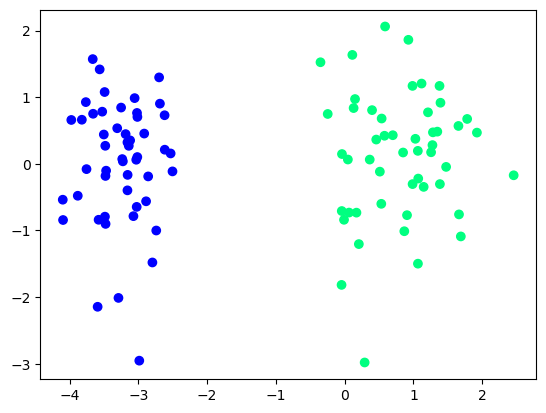

In [21]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter')

In [71]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty=None, solver='sag')
lor.fit(X,y)
print(lor.coef_)
print(lor.intercept_)

[[4.78915928 0.21074954]]
[5.75525204]


C:\Users\jawwa\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [72]:
m1 = -lor.coef_[0][0]/lor.coef_[0][1]
b1 = -lor.intercept_[0]/lor.coef_[0][1]

x_input = np.linspace(X.min(),X.max(),1000)
y_input = m1*x_input + b1

(-4.0989676754749915, 2.45686591341843)

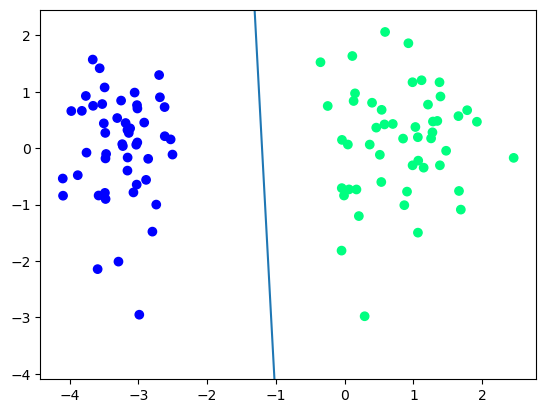

In [73]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter')
plt.plot(x_input,y_input)
plt.ylim(X.min(),X.max())

In [80]:
def gd(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5

    for i in range(3500):
        y_hat = sigmoid(np.dot(X,weights))
        derOffLoss = -1/X.shape[0] * np.dot((y - y_hat),X)
        weights = weights - lr * (derOffLoss)
    return weights[0],weights[1:]


def sigmoid(x):
    return 1/(1 + np.exp(-x))
    

In [81]:
intercept_,coef_ = gd(X,y)

m2 = -coef_[0]/coef_[1]
b2 = -intercept_/coef_[1]

x_input2 = np.linspace(X.min(),X.max(),1000)
y_input2 = m2*x_input2 + b2

(-4.0989676754749915, 2.45686591341843)

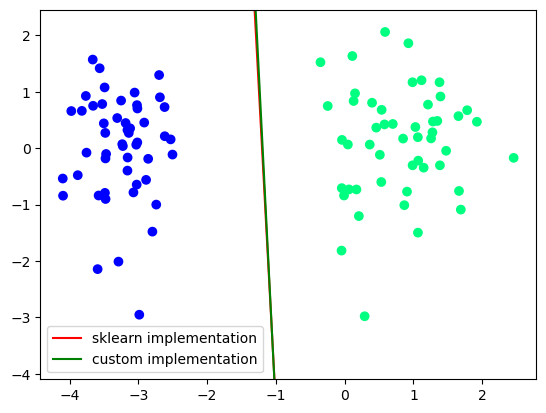

In [82]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter')
plt.plot(x_input,y_input,color='red',label='sklearn implementation')
plt.plot(x_input2,y_input2,color='green',label='custom implementation')
plt.legend()
plt.ylim(X.min(),X.max())


In [31]:
y.shape,X.shape

((100,), (100, 2))

In [37]:
np.dot(np.insert(X,0,1,axis=1),np.array([1,1,1])).shape

(100,)